In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar100.load_data()

In [4]:
train_images

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [195, 205, 193],
         [212, 224, 204],
         [182, 194, 167]],

        [[255, 255, 255],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [170, 176, 150],
         [161, 168, 130],
         [146, 154, 113]],

        [[255, 255, 255],
         [254, 254, 254],
         [255, 255, 255],
         ...,
         [189, 199, 169],
         [166, 178, 130],
         [121, 133,  87]],

        ...,

        [[148, 185,  79],
         [142, 182,  57],
         [140, 179,  60],
         ...,
         [ 30,  17,   1],
         [ 65,  62,  15],
         [ 76,  77,  20]],

        [[122, 157,  66],
         [120, 155,  58],
         [126, 160,  71],
         ...,
         [ 22,  16,   3],
         [ 97, 112,  56],
         [141, 161,  87]],

        [[ 87, 122,  41],
         [ 88, 122,  39],
         [101, 134,  56],
         ...,
         [ 34,  36,  10],
        

In [5]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [6]:
train_images

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.76470588, 0.80392157, 0.75686275],
         [0.83137255, 0.87843137, 0.8       ],
         [0.71372549, 0.76078431, 0.65490196]],

        [[1.        , 1.        , 1.        ],
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         ...,
         [0.66666667, 0.69019608, 0.58823529],
         [0.63137255, 0.65882353, 0.50980392],
         [0.57254902, 0.60392157, 0.44313725]],

        [[1.        , 1.        , 1.        ],
         [0.99607843, 0.99607843, 0.99607843],
         [1.        , 1.        , 1.        ],
         ...,
         [0.74117647, 0.78039216, 0.6627451 ],
         [0.65098039, 0.69803922, 0.50980392],
         [0.4745098 , 0.52156863, 0.34117647]],

        ...,

        [[0.58039216, 0.7254902 , 0.30980392],
         [0.55686275, 0.71372549, 0.22352941]

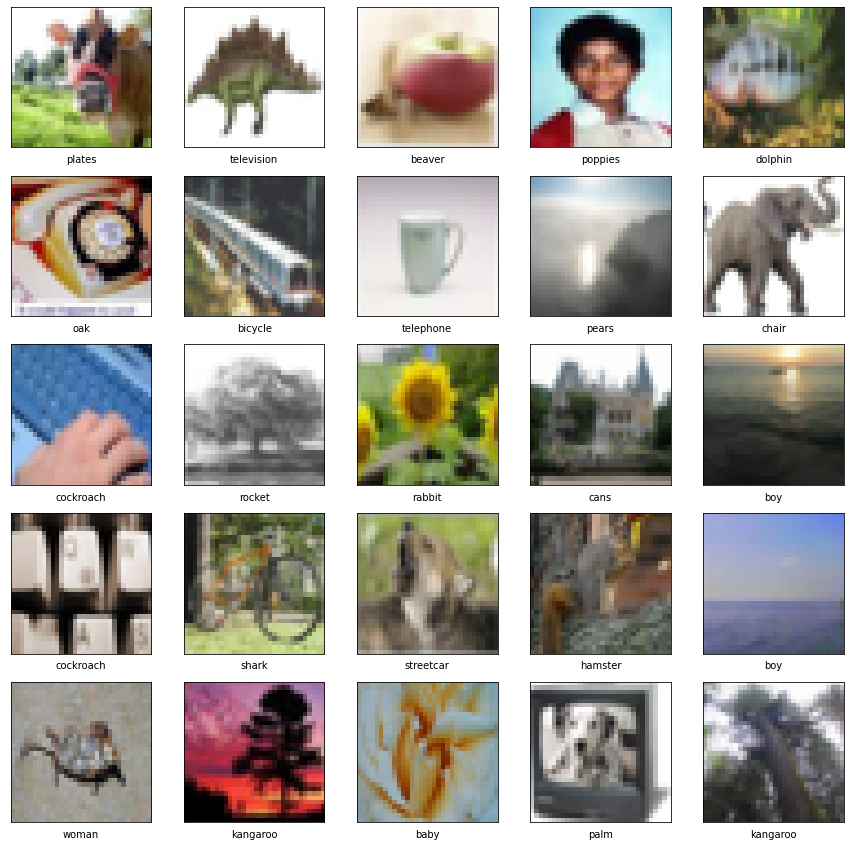

In [7]:
class_names = ['beaver', 'dolphin', 'otter', 'seal', 'whale',
               'aquarium' 'fish', 'flatfish', 'ray', 'shark', 'trout',
               'orchids', 'poppies', 'roses', 'sunflowers', 'tulips',
               'bottles', 'bowls', 'cans', 'cups', 'plates',
               'apples', 'mushrooms', 'oranges', 'pears', 'sweet' 'peppers',
               'clock', 'computer' 'keyboard', 'lamp', 'telephone', 'television',
               'bed', 'chair', 'couch', 'table', 'wardrobe',
               'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach',
               'bear', 'leopard', 'lion', 'tiger', 'wolf',
               'bridge', 'castle', 'house', 'road', 'skyscraper',
               'cloud', 'forest', 'mountain', 'plain', 'sea',
               'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo',
               'fox', 'porcupine', 'possum', 'raccoon', 'skunk',
               'crab', 'lobster', 'snail', 'spider', 'worm',
               'baby', 'boy', 'girl', 'man', 'woman',
               'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle',
               'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel',
               'maple', 'oak', 'palm', 'pine', 'willow',
               'bicycle', 'bus', 'motorcycle', 'pickup' 'truck', 'train',
               'lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor']

plt.figure(figsize=(15,15))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]]) 

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         147584    
                                                                 
Total params: 223232 (872.00 KB)
Trainable params: 22323

In [10]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(100))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         147584    
                                                                 
 flatten (Flatten)           (None, 2048)              0

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images,test_labels))

Epoch 1/20
1563/1563 [==============================] - 170s 107ms/step - loss: 4.0342 - accuracy: 0.0795 - val_loss: 3.5395 - val_accuracy: 0.1557
Epoch 2/20
1563/1563 [==============================] - 134s 86ms/step - loss: 3.4664 - accuracy: 0.1681 - val_loss: 3.2282 - val_accuracy: 0.2203
Epoch 3/20
1563/1563 [==============================] - 122s 78ms/step - loss: 3.1847 - accuracy: 0.2216 - val_loss: 2.9859 - val_accuracy: 0.2638
Epoch 4/20
1563/1563 [==============================] - 123s 79ms/step - loss: 2.9973 - accuracy: 0.2588 - val_loss: 2.8195 - val_accuracy: 0.2928
Epoch 5/20
1563/1563 [==============================] - 124s 79ms/step - loss: 2.8585 - accuracy: 0.2811 - val_loss: 2.7810 - val_accuracy: 0.3072
Epoch 6/20
1563/1563 [==============================] - 120s 77ms/step - loss: 2.7605 - accuracy: 0.3026 - val_loss: 2.6473 - val_accuracy: 0.3298
Epoch 7/20
1563/1563 [==============================] - 119s 76ms/step - loss: 2.6647 - accuracy: 0.3216 - val_loss: 

313/313 - 5s - loss: 2.3533 - accuracy: 0.3961 - 5s/epoch - 15ms/step


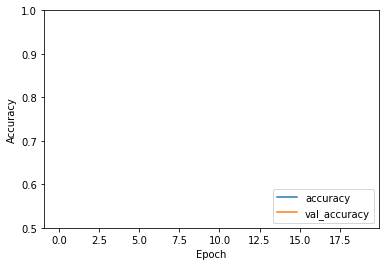

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)